# Proyecto final de Machine Learning

In [102]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
import warnings 
warnings.filterwarnings('ignore')

In [104]:
# Antes de ejecutar el código debemos asegurarnos de que hemos instalado las siguientes librerías
# pip install pandas
# pip install sodapy
from sodapy import Socrata

In [105]:
# Conexión API datos Colombia
client = Socrata("www.datos.gov.co", None)

In [106]:
# Primeros 100000 resultados, devueltos como JSON desde la API / convertidos a lista de diccionarios de Python por sodapy.
results = client.get("gt2j-8ykr", limit=100000)

In [107]:
# Conversión de los datos a un DataFrame con Pandas
results_df = pd.DataFrame.from_records(results)
results_df.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,fecha_muerte,nom_grupo_,pais_viajo_1_cod,pais_viajo_1_nom
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,Recuperado,2020-12-21 00:00:00,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,Recuperado,2020-12-07 00:00:00,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,Recuperado,2020-12-18 00:00:00,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,Fallecido,2020-12-17 00:00:00,2020-12-23 00:00:00,NaN,NaN,6,2020-12-30 00:00:00,NaN,NaN,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,Recuperado,2020-12-21 00:00:00,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN


In [108]:
# Dimensiones del DataFrame
results_df.shape

(100000, 23)

In [109]:
# Información acerca de los tipos de dato y valores no nulos del conjunto de datos.
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   fecha_reporte_web      100000 non-null  object
 1   id_de_caso             100000 non-null  object
 2   fecha_de_notificaci_n  100000 non-null  object
 3   departamento           100000 non-null  object
 4   departamento_nom       100000 non-null  object
 5   ciudad_municipio       100000 non-null  object
 6   ciudad_municipio_nom   100000 non-null  object
 7   edad                   100000 non-null  object
 8   unidad_medida          100000 non-null  object
 9   sexo                   100000 non-null  object
 10  fuente_tipo_contagio   100000 non-null  object
 11  ubicacion              100000 non-null  object
 12  estado                 100000 non-null  object
 13  recuperado             100000 non-null  object
 14  fecha_inicio_sintomas  92425 non-null   object
 15  f

In [110]:
# Identificación de los valores nulos, para cada una de las columnas del conjunto de datos
results_df.isnull().sum().sort_values(ascending=False)

pais_viajo_1_nom         99933
pais_viajo_1_cod         99933
nom_grupo_               98246
fecha_muerte             96635
fecha_inicio_sintomas     7575
tipo_recuperacion         3258
fecha_recuperado          3258
fecha_diagnostico          127
ciudad_municipio_nom         0
departamento_nom             0
ciudad_municipio             0
fecha_de_notificaci_n        0
id_de_caso                   0
fecha_reporte_web            0
departamento                 0
recuperado                   0
estado                       0
ubicacion                    0
fuente_tipo_contagio         0
unidad_medida                0
sexo                         0
edad                         0
per_etn_                     0
dtype: int64

In [166]:
# Generación de una copia del conjunto de datos para realizar una limpieza de la información
data_c = results_df.copy()
data_c.head()

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,fecha_muerte,nom_grupo_,pais_viajo_1_cod,pais_viajo_1_nom
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,Recuperado,2020-12-21 00:00:00,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,Recuperado,2020-12-07 00:00:00,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,Recuperado,2020-12-18 00:00:00,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,Fallecido,2020-12-17 00:00:00,2020-12-23 00:00:00,NaN,NaN,6,2020-12-30 00:00:00,NaN,NaN,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,Recuperado,2020-12-21 00:00:00,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN,NaN,NaN,NaN


In [167]:
# Verificación de la identificación de caso única, para evitar utilizar datos duplicados
data_c['id_de_caso'].nunique()

100000

In [168]:
# Eliminación de información irrelevante
data_c = data_c.drop(columns=['fecha_reporte_web', 'id_de_caso', 'fecha_de_notificaci_n', 'fecha_inicio_sintomas', 'fecha_recuperado', 'fecha_muerte', 'nom_grupo_'])
data_c.head()

,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,fuente_tipo_contagio,ubicacion,estado,recuperado,fecha_diagnostico,tipo_recuperacion,per_etn_,pais_viajo_1_cod,pais_viajo_1_nom
0,76,VALLE,76001,CALI,67,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-23 00:00:00,Tiempo,6,NaN,NaN
1,76,VALLE,76001,CALI,66,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-23 00:00:00,Tiempo,6,NaN,NaN
2,76,VALLE,76001,CALI,68,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-22 00:00:00,Tiempo,6,NaN,NaN
3,76,VALLE,76001,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,Fallecido,2020-12-23 00:00:00,NaN,6,NaN,NaN
4,76,VALLE,76001,CALI,65,1,F,Comunitaria,Casa,Leve,Recuperado,2020-12-23 00:00:00,Tiempo,6,NaN,NaN


In [169]:
# Fecha de diagnostico
# Cambiando el formato de la columna 'fecha_diagnostico'
data_c['fecha_diagnostico'] = pd.to_datetime(data_c['fecha_diagnostico'].str.split(' ').str[0], format = '%Y-%m-%d')

In [170]:
# Cambiando el formato de las columnas en valores numericos
data_c['departamento'] = data_c['departamento'].astype(int)

In [171]:
# Código DIVIPOLA municipio
data_c['ciudad_municipio'] = data_c['ciudad_municipio'].astype(int)

In [172]:
# Pertenencia étnica
#1-Indígena 2-ROM 3-Raizal 4-Palenquero 5-Negro 6-Otro
data_c['per_etn_'] = data_c['per_etn_'].astype(int)

In [173]:
# Edad
data_c['edad'] = data_c['edad'].astype(int)

In [174]:
# Unidad de medida de edad
# 1-Años 2-Meses 3-Días
data_c['unidad_medida'] = data_c['unidad_medida'].astype(int)

In [175]:
data_c.loc[data_c['unidad_medida'] == 2, 'edad'] = data_c['edad'] / 12
data_c.loc[data_c['unidad_medida'] == 3, 'edad'] = data_c['edad'] / 365
data_c['edad'] = data_c['edad'].round()

In [176]:
edad = data_c["edad"].value_counts()
print(f"{edad}")

edad
28.0     2612
29.0     2587
27.0     2565
30.0     2532
26.0     2531
         ... 
105.0       1
107.0       1
103.0       1
104.0       1
106.0       1
Name: count, Length: 108, dtype: int64


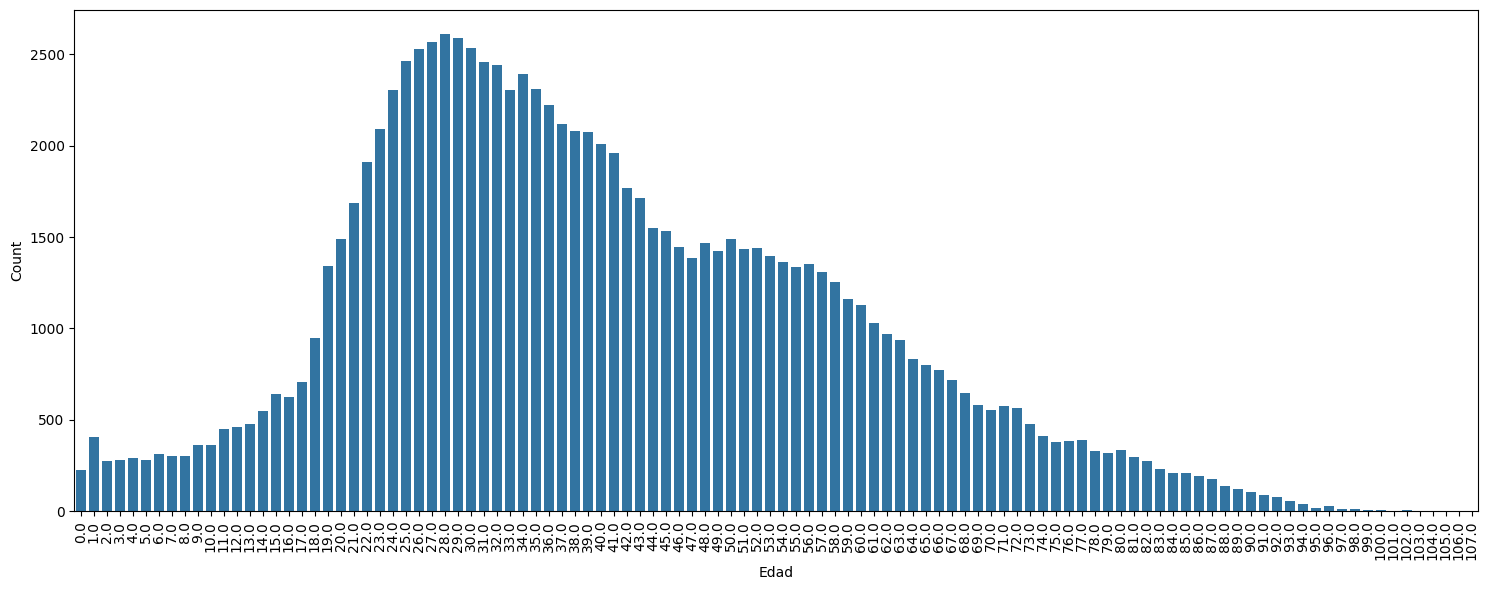

In [177]:
plt.figure(figsize=(15,6))
sns.barplot(x=edad.index, y=edad.values).set(xlabel ="Edad", ylabel = "Count", title =None)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [178]:
data_c = data_c.drop(columns=['unidad_medida'])
data_c.head()

,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,sexo,fuente_tipo_contagio,ubicacion,estado,recuperado,fecha_diagnostico,tipo_recuperacion,per_etn_,pais_viajo_1_cod,pais_viajo_1_nom
0,76,VALLE,76001,CALI,67.0,F,Comunitaria,Casa,Leve,Recuperado,2020-12-23,Tiempo,6,NaN,NaN
1,76,VALLE,76001,CALI,66.0,F,Comunitaria,Casa,Leve,Recuperado,2020-12-23,Tiempo,6,NaN,NaN
2,76,VALLE,76001,CALI,68.0,F,Comunitaria,Casa,Leve,Recuperado,2020-12-22,Tiempo,6,NaN,NaN
3,76,VALLE,76001,CALI,74.0,F,Comunitaria,Fallecido,Fallecido,Fallecido,2020-12-23,NaN,6,NaN,NaN
4,76,VALLE,76001,CALI,65.0,F,Comunitaria,Casa,Leve,Recuperado,2020-12-23,Tiempo,6,NaN,NaN


Colombia está dividida en 32 departamentos, cada uno con una capital. La capital del país es Bogotá, que también es un distrito capital.

In [179]:
# Ver pares únicos de código y nombre para cada departamento
unique_pairs_d = data_c[['departamento', 'departamento_nom']].drop_duplicates()
unique_pairs_d

,departamento,departamento_nom
0,76,VALLE
14,5,ANTIOQUIA
15,11,BOGOTA
17,68,SANTANDER
18,54,NORTE SANTANDER
19,17,CALDAS
22,25,CUNDINAMARCA
28,18,CAQUETA
30,63,QUINDIO
32,66,RISARALDA


In [180]:
print(len(unique_pairs_d))

36


In [181]:
data_c['departamento'] = data_c['departamento'].replace(47001, 47)
data_c['departamento'] = data_c['departamento'].replace(8001, 8)
data_c['departamento'] = data_c['departamento'].replace(13001, 13)

In [182]:
data_c['departamento_nom'] = data_c['departamento_nom'].replace('STA MARTA D.E.', 'MAGDALENA')
data_c['departamento_nom'] = data_c['departamento_nom'].replace('BARRANQUILLA', 'ATLANTICO')
data_c['departamento_nom'] = data_c['departamento_nom'].replace('CARTAGENA', 'BOLIVAR')

In [183]:
unique_pairs_d = data_c[['departamento', 'departamento_nom']].drop_duplicates()
print(len(unique_pairs_d))

33


In [184]:
# Ver pares únicos de código y nombre para cada municipio
unique_pairs_c = data_c[['ciudad_municipio', 'ciudad_municipio_nom']].drop_duplicates()
unique_pairs_c

,ciudad_municipio,ciudad_municipio_nom
0,76001,CALI
14,5266,ENVIGADO
15,11001,BOGOTA
17,68001,BUCARAMANGA
18,54001,CUCUTA
...,...,...
97530,54109,BUCARASICA
97797,8549,PIOJO
97870,19418,LOPEZ (MICAY)
98437,15218,COVARACHIA


In [185]:
# ¿Hay códigos con más de un nombre?
print(unique_pairs_c.groupby('ciudad_municipio')['ciudad_municipio_nom'].nunique().sort_values(ascending=False))

ciudad_municipio
99773    1
5001     1
5002     1
5004     1
5021     1
        ..
5059     1
5055     1
5051     1
5045     1
5044     1
Name: ciudad_municipio_nom, Length: 955, dtype: int64


In [186]:
departamento_nom = data_c["departamento_nom"].value_counts()

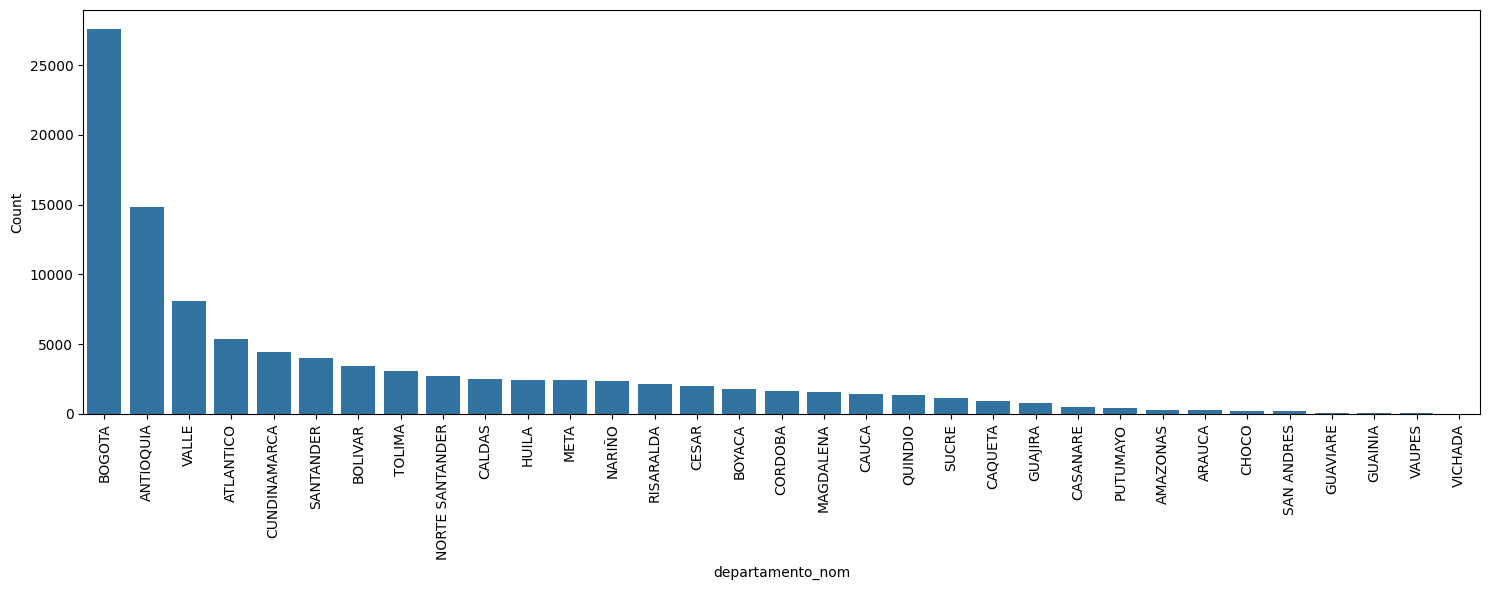

In [187]:
plt.figure(figsize=(15,6))
sns.barplot(x=departamento_nom.index, y=departamento_nom.values).set(xlabel ="departamento_nom", ylabel = "Count", title =None)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [188]:
sexo=data_c["sexo"].value_counts()
print(f"{sexo}")

sexo
F    50372
M    49628
Name: count, dtype: int64


In [189]:
data_c = pd.get_dummies(data_c, columns = ['sexo'])

In [190]:
data_c['sexo_F'] = data_c['sexo_F'].astype(int)
data_c['sexo_M'] = data_c['sexo_M'].astype(int)
data_c.head()

,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,fuente_tipo_contagio,ubicacion,estado,recuperado,fecha_diagnostico,tipo_recuperacion,per_etn_,pais_viajo_1_cod,pais_viajo_1_nom,sexo_F,sexo_M
0,76,VALLE,76001,CALI,67.0,Comunitaria,Casa,Leve,Recuperado,2020-12-23,Tiempo,6,NaN,NaN,1,0
1,76,VALLE,76001,CALI,66.0,Comunitaria,Casa,Leve,Recuperado,2020-12-23,Tiempo,6,NaN,NaN,1,0
2,76,VALLE,76001,CALI,68.0,Comunitaria,Casa,Leve,Recuperado,2020-12-22,Tiempo,6,NaN,NaN,1,0
3,76,VALLE,76001,CALI,74.0,Comunitaria,Fallecido,Fallecido,Fallecido,2020-12-23,NaN,6,NaN,NaN,1,0
4,76,VALLE,76001,CALI,65.0,Comunitaria,Casa,Leve,Recuperado,2020-12-23,Tiempo,6,NaN,NaN,1,0


In [191]:
fuente_tipo_contagio = data_c["fuente_tipo_contagio"].value_counts()
print(f"{fuente_tipo_contagio}")

fuente_tipo_contagio
Comunitaria    76358
Relacionado    23575
Importado         67
Name: count, dtype: int64


In [193]:
# * Corresponde a muertes no relacionadas con COVID-19, aún si eran casos activos **Hay pacientes recuperados para COVID-19, que pueden permanecer en hospitalización por otras comorbilidades
ubicacion = data_c["ubicacion"].value_counts()
print(f"{ubicacion}")

ubicacion
Casa         96630
Fallecido     2808
N/A            557
casa             5
Name: count, dtype: int64


In [194]:
data_c['ubicacion'] = data_c['ubicacion'].replace('casa', 'Casa')

In [195]:
# * Corresponde a muertes no relacionadas con COVID-19, aún si eran casos activos **Hay pacientes recuperados para COVID-19, que pueden permanecer en hospitalización por otras comorbilidades
estado = data_c["estado"].value_counts()
print(f"{estado}")

estado
Leve         96630
Fallecido     2808
N/A            557
leve             5
Name: count, dtype: int64


In [196]:
data_c['estado'] = data_c['estado'].replace('leve', 'Leve')

In [39]:
# Recuperado Fallecido N/A (Vacío). N/A se refiere a los fallecidos no COVID. 
# Pueden haber casos recuperados con ubicación Hospital u Hospital UCI, ya que permanecen en hospitalización por causas diferentes. 
# Los casos con información en blanco en esta columna corresponde a los casos activos
recuperado = data_c["recuperado"].value_counts()
print(f"{recuperado}")

recuperado
Recuperado    96742
Fallecido      2799
N/A             449
fallecido        10
Name: count, dtype: int64


In [197]:
data_c['recuperado'] = data_c['recuperado'].replace('fallecido', 'Fallecido')

In [198]:
# Se refiere a la variable de tipo de recuperación que tiene dos opciones: PCR y tiempo. 
# PCR indica que la persona se encuentra recuperada por segunda muestra, en donde dio negativo para el virus; 
# Tiempo significa que son personas que cumplieron 30 días posteriores al inicio de síntomas o toma de muestras que no tienen síntomas, 
# que no tengan más de 70 años ni que estén hospitalizados.
data_c['tipo_recuperacion'] = data_c['tipo_recuperacion'].replace('NaN', np.nan)
tipo_recuperacion = data_c["tipo_recuperacion"].value_counts()
print(f"{tipo_recuperacion}")

tipo_recuperacion
Tiempo    75713
PCR       21029
Name: count, dtype: int64


In [199]:
pais_viajo_1_nom = data_c["pais_viajo_1_nom"].value_counts()
print(f"{pais_viajo_1_nom}")

pais_viajo_1_nom
ESTADOS UNIDOS DE AMÉRICA    27
MÉXICO                       11
BRASIL                        6
REPÚBLICA DOMINICANA          5
ECUADOR                       4
PERÚ                          2
ESPAÑA                        2
EL SALVADOR                   2
PORTUGAL                      1
FRANCIA                       1
ALEMANIA                      1
PANAMÁ                        1
ARMENIA                       1
EMIRATOS ARABES UNIDOS        1
NORUEGA                       1
DOMINICA                      1
Name: count, dtype: int64


In [200]:
pais_viajo_1_cod = data_c["pais_viajo_1_cod"].value_counts()
print(f"{pais_viajo_1_cod}")

pais_viajo_1_cod
840    27
484    11
76      6
214     5
218     4
604     2
724     2
222     2
620     1
250     1
276     1
591     1
51      1
784     1
578     1
212     1
Name: count, dtype: int64


In [201]:
data_c

,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,fuente_tipo_contagio,ubicacion,estado,recuperado,fecha_diagnostico,tipo_recuperacion,per_etn_,pais_viajo_1_cod,pais_viajo_1_nom,sexo_F,sexo_M
0,76,VALLE,76001,CALI,67.0,Comunitaria,Casa,Leve,Recuperado,2020-12-23,Tiempo,6,NaN,NaN,1,0
1,76,VALLE,76001,CALI,66.0,Comunitaria,Casa,Leve,Recuperado,2020-12-23,Tiempo,6,NaN,NaN,1,0
2,76,VALLE,76001,CALI,68.0,Comunitaria,Casa,Leve,Recuperado,2020-12-22,Tiempo,6,NaN,NaN,1,0
3,76,VALLE,76001,CALI,74.0,Comunitaria,Fallecido,Fallecido,Fallecido,2020-12-23,NaN,6,NaN,NaN,1,0
4,76,VALLE,76001,CALI,65.0,Comunitaria,Casa,Leve,Recuperado,2020-12-23,Tiempo,6,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11,BOGOTA,11001,BOGOTA,37.0,Comunitaria,Casa,Leve,Recuperado,2020-08-02,Tiempo,6,NaN,NaN,0,1
99996,11,BOGOTA,11001,BOGOTA,44.0,Comunitaria,Casa,Leve,Recuperado,2020-08-03,PCR,6,NaN,NaN,0,1
99997,11,BOGOTA,11001,BOGOTA,31.0,Comunitaria,Casa,Leve,Recuperado,2020-12-15,PCR,6,NaN,NaN,0,1
99998,11,BOGOTA,11001,BOGOTA,10.0,Relacionado,Casa,Leve,Recuperado,2020-12-17,Tiempo,6,NaN,NaN,1,0
